# Loading

In [1]:
import pandas as pd
import numpy as np
import json
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('df_details.csv')

In [3]:
df.shape

(15212, 8)

In [4]:
df.head()

,Unnamed: 0,Unnamed: 0.1,username,data,global rank,india rank,rating,country
0,0,0,aryanc403,"{'username': 'aryanc403', 'githubUrl': None, '...",120,1,2841.96,India
1,1,1,dganguli1997,"{'username': 'dganguli1997', 'githubUrl': 'htt...",5019,501,2053.90,India
2,2,2,rajat_2548,"{'username': 'rajat_2548', 'githubUrl': None, ...",13295,1501,1856.61,India
3,3,3,Anish0909,"{'username': 'Anish0909', 'githubUrl': None, '...",9200,1001,1930.58,India
4,4,4,ap1008,"{'username': 'ap1008', 'githubUrl': None, 'twi...",222,2,2707.79,India


In [5]:
df = df[['username', 'data', 'global rank', 'india rank', 'rating', 'country']]

In [6]:
df.columns = ['username', 'data', 'global', 'india', 'rating', 'country']

In [7]:
df.country.value_counts()

India    15212
Name: country, dtype: int64

In [8]:
df.drop('country', axis = 1, inplace = True)

In [9]:
df.head()

,username,data,global,india,rating
0,aryanc403,"{'username': 'aryanc403', 'githubUrl': None, '...",120,1,2841.96
1,dganguli1997,"{'username': 'dganguli1997', 'githubUrl': 'htt...",5019,501,2053.90
2,rajat_2548,"{'username': 'rajat_2548', 'githubUrl': None, ...",13295,1501,1856.61
3,Anish0909,"{'username': 'Anish0909', 'githubUrl': None, '...",9200,1001,1930.58
4,ap1008,"{'username': 'ap1008', 'githubUrl': None, 'twi...",222,2,2707.79


In [10]:
df.sort_values('india', inplace = True)

In [11]:
df.head()

,username,data,global,india,rating
0,aryanc403,"{'username': 'aryanc403', 'githubUrl': None, '...",120,1,2841.96
4,ap1008,"{'username': 'ap1008', 'githubUrl': None, 'twi...",222,2,2707.79
5,LosingNowLosingLate,"{'username': 'LosingNowLosingLate', 'githubUrl...",230,3,2701.02
9,taran_1407,"{'username': 'taran_1407', 'githubUrl': None, ...",264,4,2676.75
13,anil9717,"{'username': 'anil9717', 'githubUrl': None, 't...",275,5,2667.42


# Processing

Check the type and format of the loaded data

In [12]:
df.data[10]

"{'username': 'AVIRAL_T', 'githubUrl': None, 'twitterUrl': None, 'linkedinUrl': 'https://linkedin.com/in/aviral-tiwari-b69207196', 'profile': {'reputation': 8, 'aboutMe': '', 'websites': ['https://codeforces.com/profile/Continuous'], 'ranking': 78467, 'userAvatar': 'https://s3-us-west-1.amazonaws.com/s3-lc-upload/assets/default_avatar.jpg', 'realName': 'Aviral Tiwari', 'countryName': 'India'}, 'languageStats': [{'languageName': 'C++', 'problemsSolved': 449}], 'skillStats': {'advanced': [{'tagName': 'Data Stream', 'tagSlug': 'data-stream', 'problemsSolved': 2}, {'tagName': 'Game Theory', 'tagSlug': 'game-theory', 'problemsSolved': 2}, {'tagName': 'Rolling Hash', 'tagSlug': 'rolling-hash', 'problemsSolved': 1}, {'tagName': 'Backtracking', 'tagSlug': 'backtracking', 'problemsSolved': 13}, {'tagName': 'Bitmask', 'tagSlug': 'bitmask', 'problemsSolved': 3}, {'tagName': 'Quickselect', 'tagSlug': 'quickselect', 'problemsSolved': 3}, {'tagName': 'Dynamic Programming', 'tagSlug': 'dynamic-progra

In [13]:
def get_problem_set(data):
    '''
    Function to generate problem_set dictionary of type and number of questions solved
    '''
    try:
        data = data.replace('\'', '\"')
        data = data.replace('None', 'null')
        data = json.loads(data)

        problem_set = dict()

        for label in ['advanced', 'intermediate', 'fundamental']:
            if label in data['skillStats'].keys():
                for problem in data['skillStats'][label]:
                    problem_set[problem['tagSlug']] = problem['problemsSolved']

        return problem_set if len(problem_set.keys()) > 0 else np.NaN
    except:
        return np.NaN

In [14]:
df['problems'] = df.data.apply(get_problem_set)

In [15]:
df.problems.isnull().sum()

355

In [16]:
df.dropna(subset = ['problems'], inplace = True)

In [17]:
df.shape

(14857, 6)

In [18]:
df.reset_index(inplace = True)

In [19]:
df.drop(['index'], axis = 1, inplace = True)

In [20]:
df.problems[0]

{'data-stream': 2,
 'game-theory': 4,
 'rolling-hash': 2,
 'backtracking': 21,
 'bitmask': 12,
 'quickselect': 3,
 'dynamic-programming': 91,
 'divide-and-conquer': 12,
 'trie': 3,
 'union-find': 14,
 'binary-indexed-tree': 5,
 'segment-tree': 3,
 'monotonic-stack': 17,
 'monotonic-queue': 1,
 'topological-sort': 5,
 'shortest-path': 2,
 'tree': 43,
 'binary-tree': 36,
 'hash-table': 87,
 'ordered-set': 8,
 'graph': 14,
 'greedy': 89,
 'binary-search': 63,
 'depth-first-search': 48,
 'breadth-first-search': 41,
 'recursion': 12,
 'sliding-window': 11,
 'bit-manipulation': 33,
 'math': 95,
 'randomized': 2,
 'design': 13,
 'iterator': 1,
 'brainteaser': 2,
 'array': 339,
 'matrix': 53,
 'string': 98,
 'simulation': 27,
 'enumeration': 6,
 'sorting': 79,
 'stack': 43,
 'queue': 3,
 'linked-list': 28,
 'two-pointers': 55}

In [21]:
problem_set = set()
for item in df.problems.iteritems():
    problem_set.update(item[1].keys())
print(len(problem_set))

46


In [22]:
problem_set

{'array',
 'backtracking',
 'binary-indexed-tree',
 'binary-search',
 'binary-tree',
 'bit-manipulation',
 'bitmask',
 'brainteaser',
 'breadth-first-search',
 'data-stream',
 'database',
 'depth-first-search',
 'design',
 'divide-and-conquer',
 'dynamic-programming',
 'enumeration',
 'game-theory',
 'graph',
 'greedy',
 'hash-table',
 'iterator',
 'line-sweep',
 'linked-list',
 'math',
 'matrix',
 'monotonic-queue',
 'monotonic-stack',
 'ordered-set',
 'queue',
 'quickselect',
 'randomized',
 'recursion',
 'rolling-hash',
 'segment-tree',
 'shortest-path',
 'simulation',
 'sliding-window',
 'sorting',
 'stack',
 'string',
 'suffix-array',
 'topological-sort',
 'tree',
 'trie',
 'two-pointers',
 'union-find'}

In [23]:
def get_problem_status(row, problem_set):
    values = list()
    for problem in problem_set:
        if problem in row[5].keys():
            values.append(row[5][problem])
        else:
            values.append(0)
    return values

df[list(problem_set)] = df.apply(lambda row: get_problem_status(row, problem_set), axis = 1, result_type = 'expand')

In [24]:
df.head()

,username,data,global,india,rating,problems,game-theory,tree,simulation,design,...,database,hash-table,sorting,line-sweep,string,divide-and-conquer,queue,bit-manipulation,sliding-window,graph
0,ap1008,"{'username': 'ap1008', 'githubUrl': None, 'twi...",222,2,2707.79,"{'data-stream': 2, 'game-theory': 4, 'rolling-...",4,43,27,13,...,0,87,79,0,98,12,3,33,11,14
1,LosingNowLosingLate,"{'username': 'LosingNowLosingLate', 'githubUrl...",230,3,2701.02,"{'data-stream': 2, 'game-theory': 6, 'rolling-...",6,55,17,26,...,0,116,69,0,131,21,6,47,19,17
2,taran_1407,"{'username': 'taran_1407', 'githubUrl': None, ...",264,4,2676.75,"{'data-stream': 8, 'game-theory': 8, 'rolling-...",8,81,33,43,...,3,171,112,2,231,20,14,47,38,36
3,anil9717,"{'username': 'anil9717', 'githubUrl': None, 't...",275,5,2667.42,"{'data-stream': 3, 'game-theory': 2, 'rolling-...",2,21,29,20,...,0,95,52,0,106,5,8,29,18,18
4,razimantv,"{'username': 'razimantv', 'githubUrl': 'https:...",320,6,2639.48,"{'data-stream': 8, 'game-theory': 5, 'rolling-...",5,96,53,50,...,0,220,137,3,255,25,21,70,39,47


In [25]:
df.shape

(14857, 52)

# Scaling

In [26]:
x = pd.concat([df.iloc[:, 4], df.iloc[:, 6:]], axis = 1)

In [27]:
scaler = MinMaxScaler()

In [28]:
scaler.fit(x)

MinMaxScaler()

In [29]:
x = pd.DataFrame(scaler.transform(x), columns = x.columns)

In [30]:
x.head()

,rating,game-theory,tree,simulation,design,stack,binary-tree,math,linked-list,brainteaser,...,database,hash-table,sorting,line-sweep,string,divide-and-conquer,queue,bit-manipulation,sliding-window,graph
0,1.000000,0.166667,0.209756,0.241071,0.111111,0.318519,0.216867,0.238693,0.400000,0.181818,...,0.000,0.194196,0.273356,0.00,0.164983,0.285714,0.078947,0.217105,0.132530,0.119658
1,0.994501,0.250000,0.268293,0.151786,0.222222,0.274074,0.283133,0.271357,0.457143,0.181818,...,0.000,0.258929,0.238754,0.00,0.220539,0.500000,0.157895,0.309211,0.228916,0.145299
2,0.974790,0.333333,0.395122,0.294643,0.367521,0.414815,0.415663,0.306533,0.542857,0.181818,...,0.015,0.381696,0.387543,0.50,0.388889,0.476190,0.368421,0.309211,0.457831,0.307692
3,0.967212,0.083333,0.102439,0.258929,0.170940,0.111111,0.108434,0.188442,0.114286,0.181818,...,0.000,0.212054,0.179931,0.00,0.178451,0.119048,0.210526,0.190789,0.216867,0.153846
4,0.944519,0.208333,0.468293,0.473214,0.427350,0.459259,0.493976,0.434673,0.614286,0.272727,...,0.000,0.491071,0.474048,0.75,0.429293,0.595238,0.552632,0.460526,0.469880,0.401709


# Elbow method

Less inertia is needed, so try elbow method

In [31]:
inertia = list()
for i in range(1, 11):
    model = KMeans(n_clusters = i, random_state = 0)
    model.fit(x)
    inertia.append(model.inertia_)

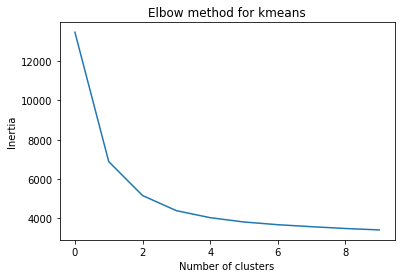

In [32]:
plt.plot([i for i in range(len(inertia))], inertia)
plt.title('Elbow method for kmeans')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

kink at n = 3

# Training

In [33]:
model = KMeans(n_clusters = 3)
x['label'] = model.fit_predict(x)

In [34]:
x.head()

,rating,game-theory,tree,simulation,design,stack,binary-tree,math,linked-list,brainteaser,...,hash-table,sorting,line-sweep,string,divide-and-conquer,queue,bit-manipulation,sliding-window,graph,label
0,1.000000,0.166667,0.209756,0.241071,0.111111,0.318519,0.216867,0.238693,0.400000,0.181818,...,0.194196,0.273356,0.00,0.164983,0.285714,0.078947,0.217105,0.132530,0.119658,2
1,0.994501,0.250000,0.268293,0.151786,0.222222,0.274074,0.283133,0.271357,0.457143,0.181818,...,0.258929,0.238754,0.00,0.220539,0.500000,0.157895,0.309211,0.228916,0.145299,2
2,0.974790,0.333333,0.395122,0.294643,0.367521,0.414815,0.415663,0.306533,0.542857,0.181818,...,0.381696,0.387543,0.50,0.388889,0.476190,0.368421,0.309211,0.457831,0.307692,0
3,0.967212,0.083333,0.102439,0.258929,0.170940,0.111111,0.108434,0.188442,0.114286,0.181818,...,0.212054,0.179931,0.00,0.178451,0.119048,0.210526,0.190789,0.216867,0.153846,1
4,0.944519,0.208333,0.468293,0.473214,0.427350,0.459259,0.493976,0.434673,0.614286,0.272727,...,0.491071,0.474048,0.75,0.429293,0.595238,0.552632,0.460526,0.469880,0.401709,0


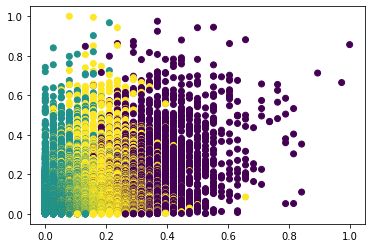

In [35]:
df1 = x[x.label == 0]
df2 = x[x.label == 1]
df3 = x[x.label == 2]

plt.scatter(x['queue'], x.rating, c = x.label, label = x.label)

In [36]:
x.describe()

,rating,game-theory,tree,simulation,design,stack,binary-tree,math,linked-list,brainteaser,...,hash-table,sorting,line-sweep,string,divide-and-conquer,queue,bit-manipulation,sliding-window,graph,label
count,14857.000000,14857.000000,14857.000000,14857.000000,14857.000000,14857.000000,14857.000000,14857.000000,14857.000000,14857.000000,...,14857.000000,14857.000000,14857.000000,14857.000000,14857.000000,14857.000000,14857.000000,14857.000000,14857.000000,14857.000000
mean,0.123693,0.110330,0.240969,0.167295,0.146405,0.209958,0.274078,0.148934,0.340510,0.120843,...,0.181566,0.184862,0.087215,0.164816,0.297178,0.152505,0.158640,0.172939,0.137838,1.257387
std,0.133606,0.124533,0.157368,0.141781,0.123323,0.143707,0.175202,0.111316,0.192248,0.142284,...,0.131624,0.136751,0.159260,0.123637,0.168102,0.125210,0.120313,0.141655,0.125306,0.707095
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.029109,0.000000,0.117073,0.062500,0.051282,0.096296,0.132530,0.067839,0.185714,0.000000,...,0.080357,0.079585,0.000000,0.070707,0.166667,0.052632,0.065789,0.060241,0.034188,1.000000
50%,0.078368,0.083333,0.229268,0.133929,0.119658,0.192593,0.265060,0.125628,0.342857,0.090909,...,0.156250,0.155709,0.000000,0.138047,0.309524,0.131579,0.138158,0.144578,0.111111,1.000000
75%,0.171169,0.166667,0.351220,0.241071,0.213675,0.303704,0.397590,0.206030,0.485714,0.181818,...,0.256696,0.262976,0.250000,0.232323,0.428571,0.236842,0.223684,0.253012,0.213675,2.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
